In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')
from src.data_preprocessing import load_data, create_binary_labels

In [2]:
wines = load_data('../data/raw/winequality-red.csv', '../data/raw/winequality-white.csv')


Loaded 1599 red wines and 4898 white wines
Total dataset size: 6497 samples

Dataset shape: (6497, 13)


In [3]:
wines.sample(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
4788,6.6,0.19,0.33,1.8,0.035,42.0,148.0,0.99196,3.15,0.36,10.2,5,1
230,5.2,0.48,0.04,1.6,0.054,19.0,106.0,0.99270,3.54,0.62,12.2,7,0


In [7]:
# 0 non-null values
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [10]:
display(wines.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


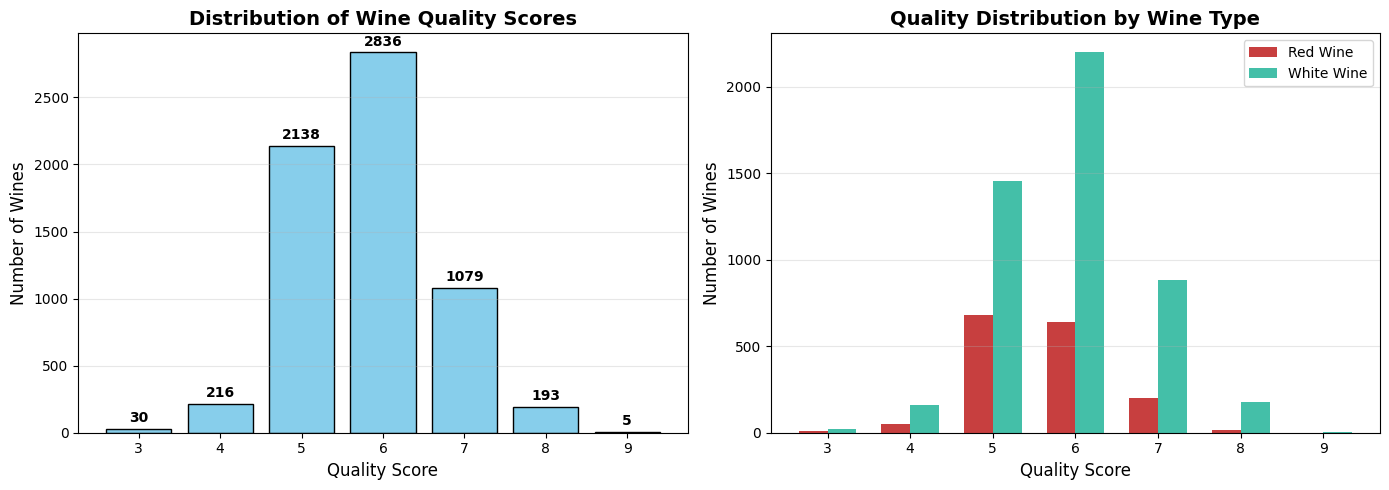

Quality score range: 3 to 9
Mean quality: 5.82
Median quality: 6


In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall quality distribution
quality_counts = wines['quality'].value_counts().sort_index()
axes[0].bar(quality_counts.index, quality_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Quality Score', fontsize=12)
axes[0].set_ylabel('Number of Wines', fontsize=12)
axes[0].set_title('Distribution of Wine Quality Scores', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(quality_counts.values):
    axes[0].text(quality_counts.index[i], v + 50, str(v), ha='center', fontweight='bold')

# Quality by wine type
red_quality = wines[wines['wine_type'] == 0]['quality'].value_counts().sort_index()
white_quality = wines[wines['wine_type'] == 1]['quality'].value_counts().sort_index()

x = np.arange(3, 10)  # Quality scores from 3 (min) to 9 (max)
red_vals = [red_quality.get(i, 0) for i in x]
white_vals = [white_quality.get(i, 0) for i in x]

width = 0.35
axes[1].bar(x - width/2, red_vals, width, label='Red Wine', color="#BA0F0F", alpha=0.8)
axes[1].bar(x + width/2, white_vals, width, label='White Wine', color="#15AF9314", alpha=0.8)
axes[1].set_xlabel('Quality Score', fontsize=12)
axes[1].set_ylabel('Number of Wines', fontsize=12)
axes[1].set_title('Quality Distribution by Wine Type', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Quality score range: {wines['quality'].min()} to {wines['quality'].max()}")
print(f"Mean quality: {wines['quality'].mean():.2f}")
print(f"Median quality: {wines['quality'].median():.0f}")

So there is:
- highly imbalanced distribution (more that 90% quality scores are from 5 to 7)

Qulity
- bad wines are 30 + 216 + 2138 = 2384 (~37%)
- good wines are 2836 + 1079 + 193 + 5 = 4113 (~63%)
- imbalance exist, but is not drastic

Red vs white
- there are much more white wines that red wines: 1599 (~25%) vs 4898 (~75%)
- additionally, white wines represent larger part of the quality wines 

In [17]:
wines.groupby("wine_type")["fixed acidity"].count()

wine_type
0    1599
1    4898
Name: fixed acidity, dtype: int64

In [24]:
wines = create_binary_labels(wines, threshold=6)


Binary label distribution:
Bad wines (quality < 6): 2384 (36.7%)
Good wines (quality >= 6): 4113 (63.3%)


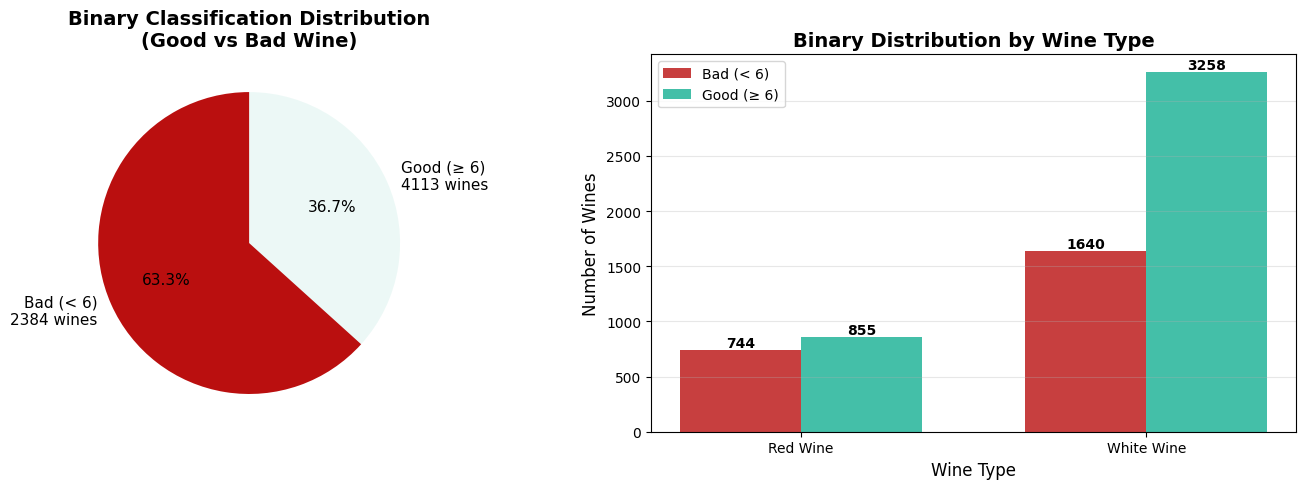

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall binary distribution
binary_counts = wines['label'].value_counts()
colors = ["#BA0F0F", "#15AF9314"]
labels_pie = [f"Bad (< 6)\n{binary_counts[0]} wines", 
              f"Good (≥ 6)\n{binary_counts[1]} wines"]
axes[0].pie(binary_counts.values, labels=labels_pie, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 11})
axes[0].set_title('Binary Classification Distribution\n(Good vs Bad Wine)', 
                  fontsize=14, fontweight='bold')

# Binary distribution by wine type
wine_type_labels = ['Red Wine', 'White Wine']
bad_counts = [wines[(wines['wine_type'] == i) & (wines['label'] == 0)].shape[0] for i in range(2)]
good_counts = [wines[(wines['wine_type'] == i) & (wines['label'] == 1)].shape[0] for i in range(2)]

x = np.arange(len(wine_type_labels))
width = 0.35
bars1 = axes[1].bar(x - width/2, bad_counts, width, label='Bad (< 6)', color="#BA0F0F", alpha=0.8)
bars2 = axes[1].bar(x + width/2, good_counts, width, label='Good (≥ 6)', color="#15AF9314", alpha=0.8)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')

axes[1].set_xlabel('Wine Type', fontsize=12)
axes[1].set_ylabel('Number of Wines', fontsize=12)
axes[1].set_title('Binary Distribution by Wine Type', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(wine_type_labels)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Feature Distributions

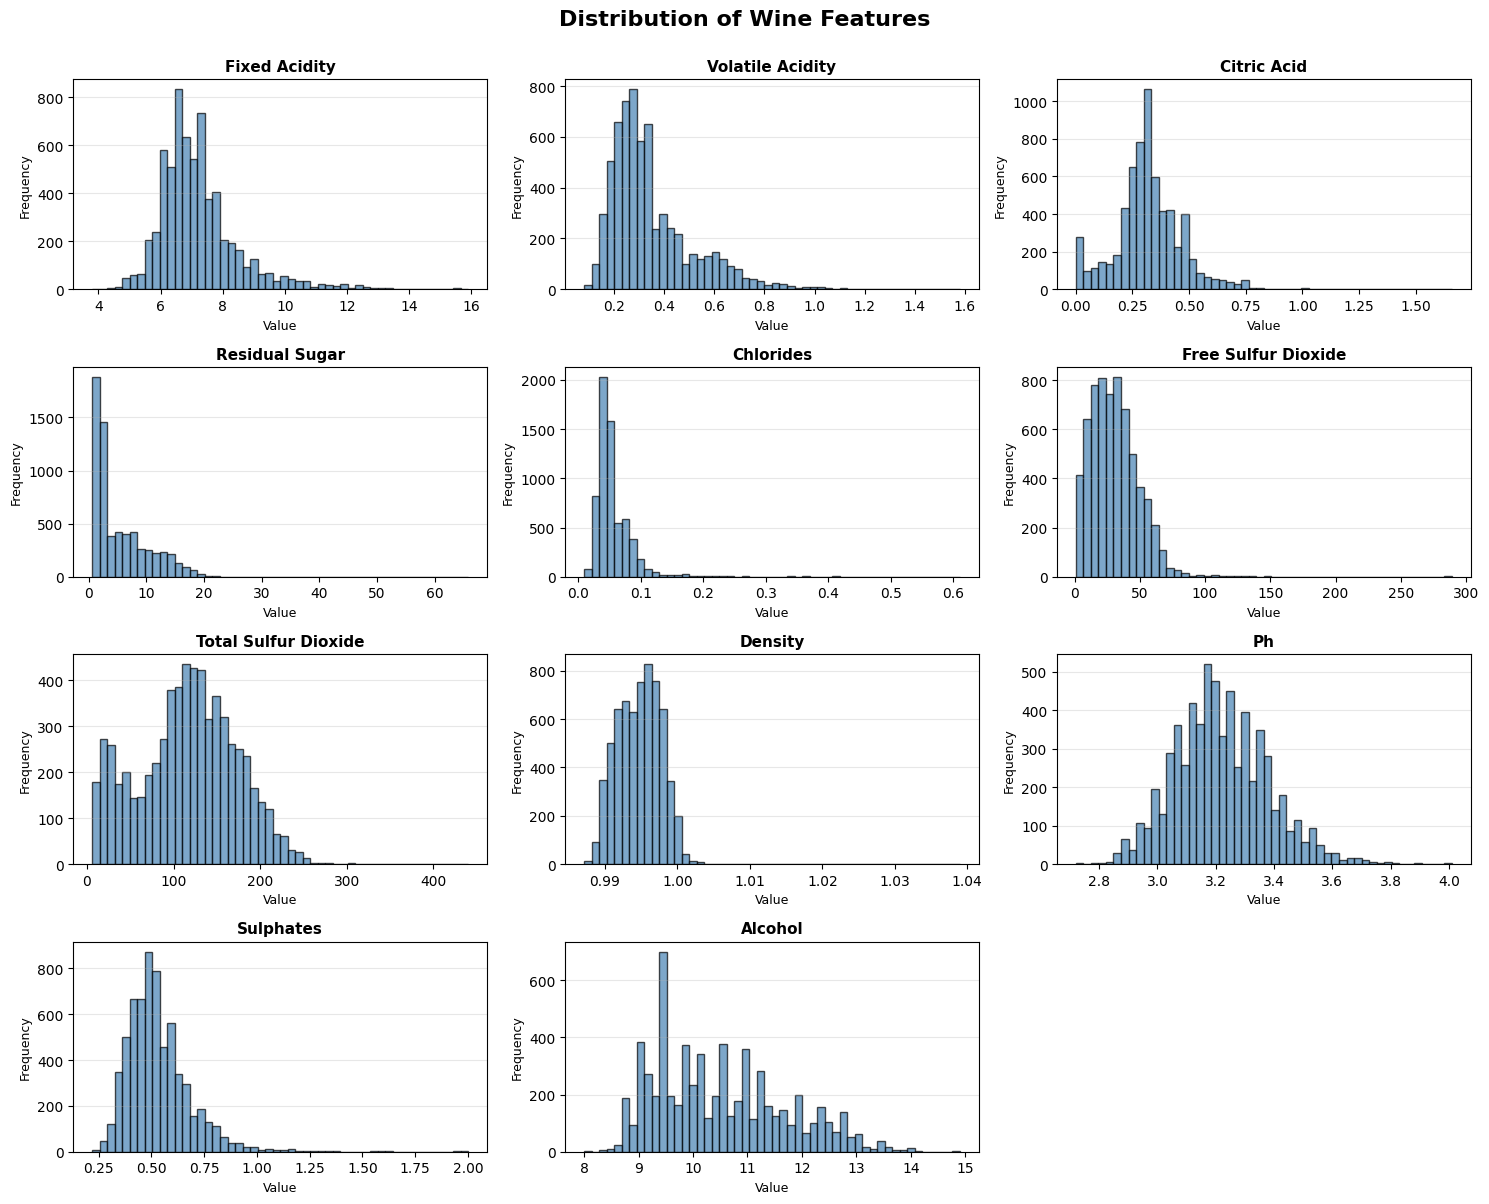

In [ ]:
feature_cols = [col for col in wines.columns if col not in ['quality', 'label', 'wine_type']]

n_features = len(feature_cols)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

for idx, feature in enumerate(feature_cols):
    axes[idx].hist(wines[feature], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(feature.replace('_', ' ').title(), fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

# Hide empty subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution of Wine Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

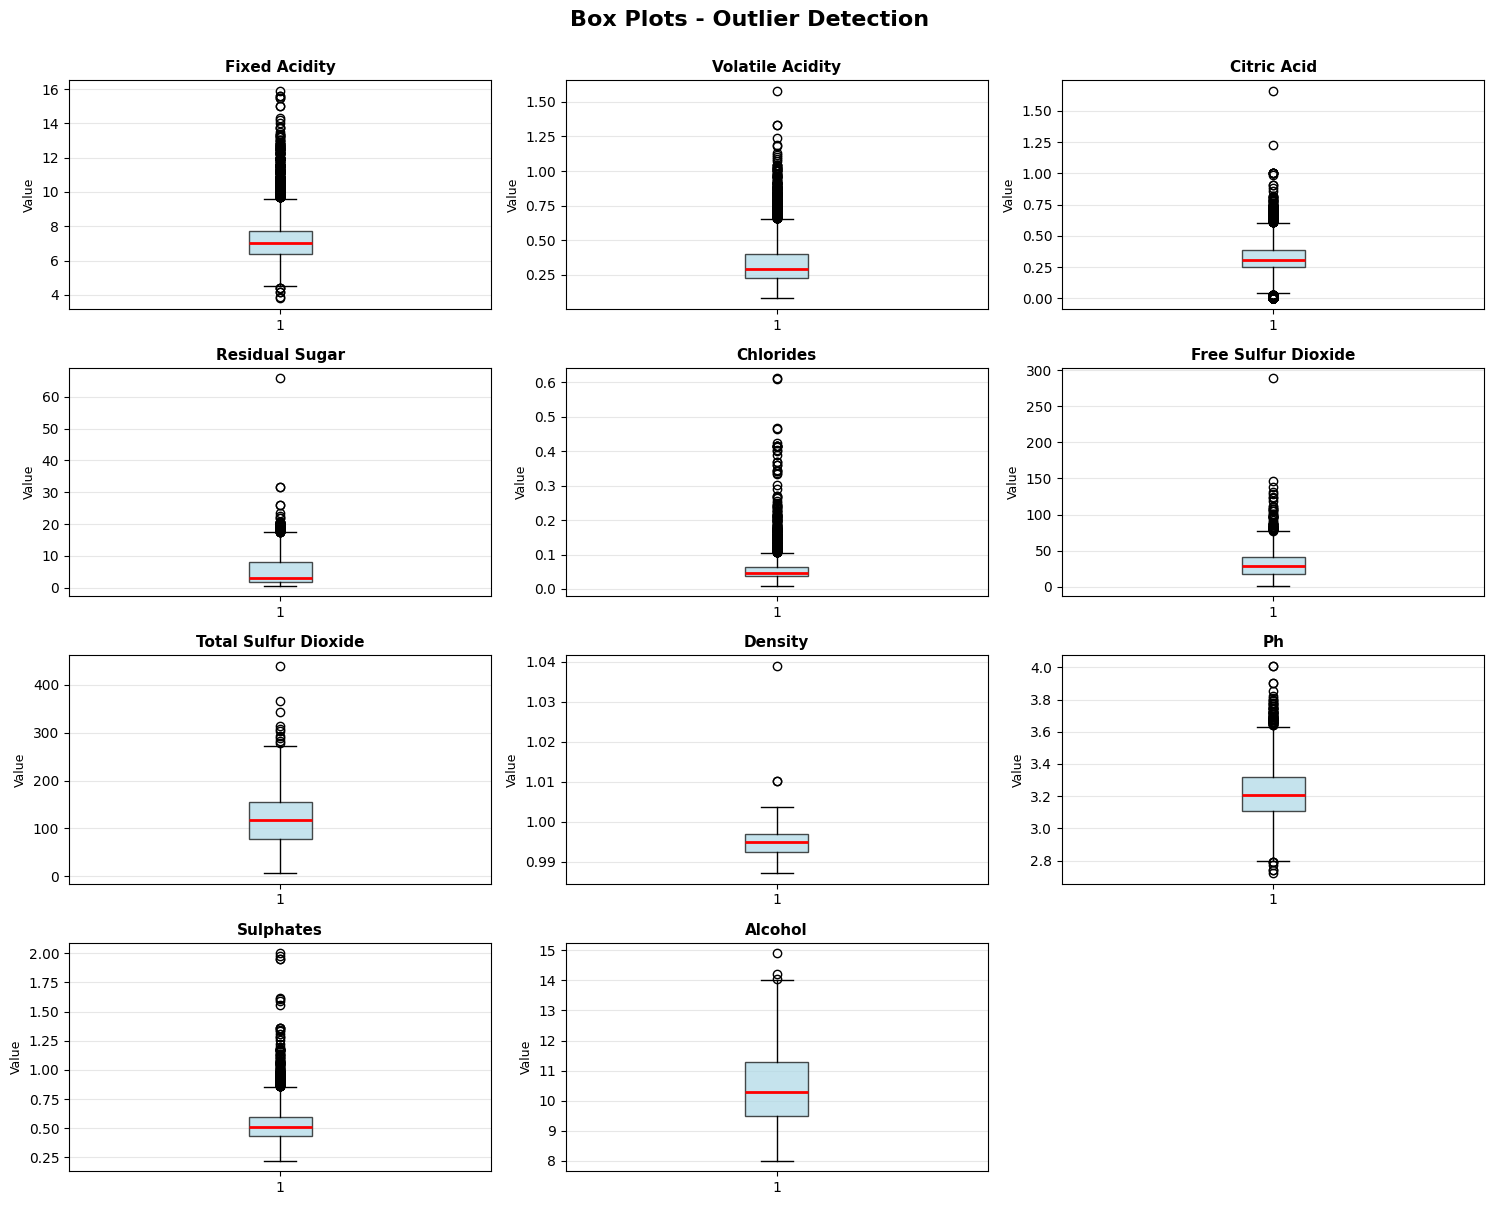

In [32]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

for idx, feature in enumerate(feature_cols):
    box = axes[idx].boxplot(wines[feature], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(feature.replace('_', ' ').title(), fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

# Hide empty subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Box Plots - Outlier Detection', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()



The dataset contains outliers, particularly in residual sugar, sulfur dioxide, chlorides and sulphates